# Damped Harmonic Oscillator with forcing
We want to solve the damped harmonic oscillator equation with a forcing term:
$$
\frac{d^2x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x = F(t)
$$
where $x$ is the displacement, $\gamma$ is the damping coefficient, $\omega_0$ is the natural frequency, and $F(t)$ is the forcing term.
We want to rewrite this equation in the form of a first-order system. We can do this by introducing a new variable $v = \frac{dx}{dt}$, which gives us the following system of equations:
$$
\frac{dx}{dt} = v
$$
$$
\frac{dv}{dt} = -2\gamma v - \omega_0^2 x + F(t)
$$
We can now write this system in matrix form:
$$
\frac{d}{dt} \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -\omega_0^2 & -2\gamma \end{pmatrix} \begin{pmatrix} x \\ v \end{pmatrix} + \begin{pmatrix} 0 \\ F(t) \end{pmatrix}
$$


In [25]:
import numpy as np

In [26]:
def ode(X, t, zeta=0.05, omega0=1.0, force=0.0):
    """
    Forced damped Harmonic Oscillator ODE
    """
    x, v = X
    dv = -2*zeta*omega0*v - omega0**2*x + force
    return [v, dv]

def rk4_single_step(f, X0, t, **kwargs):
    """
    Fourth-order Runge-Kutta method for solving ODEs

    """
    assert len(t) == 2, "t must have two elements"
    dt = t[1] - t[0]
    assert dt > 0, "t must be increasing"
    

    k1 = f(X0, t[0], **kwargs)
    k2 = f(X0 + 0.5*dt*np.array(k1), t[0] + 0.5*dt, **kwargs)
    k3 = f(X0 + 0.5*dt*np.array(k2), t[0] + 0.5*dt, **kwargs)
    k4 = f(X0 + dt*np.array(k3), t[1], **kwargs)
    X = X0 + (dt/6)*(np.array(k1) + 2*np.array(k2) + 2*np.array(k3) + np.array(k4))

    return X

In [45]:
# Given initial conditions and a forcing over time
X0 = [1.0, 0.0]  # initial position and velocity
t = np.linspace(0, 1000, 100000)  # time array
force = 0.0001*np.random.random(t.shape)+ np.sin(1*t)  # example forcing function
X = np.zeros((len(t), len(X0)))
X[0] = X0
for i in range(1, len(t)):
    X[i] = rk4_single_step(ode, X[i-1], [t[i-1], t[i]], zeta=0.0,force=force[i])
    assert np.all(np.isfinite(X)), "RK4 step resulted in non-finite values"

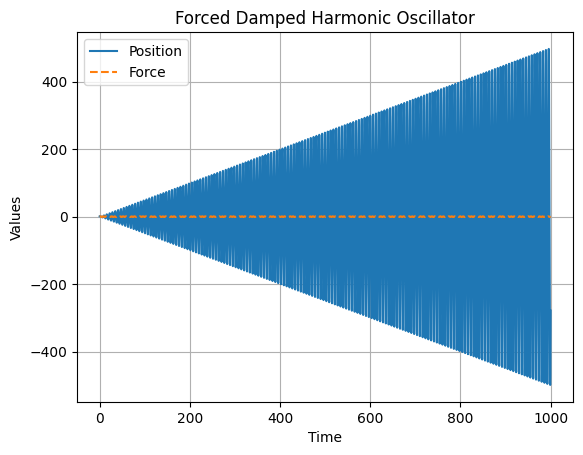

In [46]:
# Plotting the results
import matplotlib.pyplot as plt
plt.plot(t, X[:, 0], label='Position')
plt.plot(t, force, label='Force', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Forced Damped Harmonic Oscillator')
plt.legend()
plt.grid()
plt.show()

In [29]:
# Generate dataset for training
# The input data is the current position velocity and forcing term at the current timestep and the output data is the position and velocity
# We wante 100000 samples
N = 1000000
dt = 0.01
input_data = np.zeros((N, 3))
output_data = np.zeros((N, 2))
for i in range(N):
    # Randomly sample the initial conditions and forcing
    X0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]
    force = np.random.uniform(-1, 1)
    t = np.array([0, dt])
    
    # Compute the next state using RK4
    X_next = rk4_single_step(ode, X0, t, force=force)
    
    # Store the input and output data
    input_data[i] = [X0[0], X0[1], force]
    output_data[i] = X_next
# Save the dataset to a file
np.savez('dataset.npz', input_data=input_data, output_data=output_data)


In [32]:
# Test that the dataset is saved correctly
data = np.load('dataset.npz')
assert 'input_data' in data, "Input data not found in the dataset"
assert 'output_data' in data, "Output data not found in the dataset"
assert data['input_data'].shape == (N, 3), "Input data shape mismatch"
assert data['output_data'].shape == (N, 2), "Output data shape mismatch"
assert np.all(np.isfinite(data['input_data'])), "Input data contains non-finite values"
assert np.all(np.isfinite(data['output_data'])), "Output data contains non-finite values"

# Check the max and min of the dataset
max_input = np.max(data['input_data'], axis=0)
min_input = np.min(data['input_data'], axis=0)
max_output = np.max(data['output_data'], axis=0)
min_output = np.min(data['output_data'], axis=0)
print("Max input:", max_input)
print("Min input:", min_input)
print("Max output:", max_output)
print("Min output:", min_output)

Max input: [0.99999405 0.99999537 0.99999714]
Min input: [-0.9999982  -0.99999984 -0.99999955]
Max output: [1.00983689 1.01760245]
Min output: [-1.00975271 -1.01711515]
